<a href="https://colab.research.google.com/github/Insomnia2304/PMP-2024/blob/main/Lab11/Ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output()

Output()

          mean     sd  hdi_3%  hdi_97%
alpha    0.000  0.008  -0.013    0.015
beta_x1  0.994  0.008   0.979    1.008
beta_x2  0.148  0.008   0.133    0.162
beta_x3 -0.119  0.008  -0.133   -0.105
eps      0.075  0.006   0.065    0.086


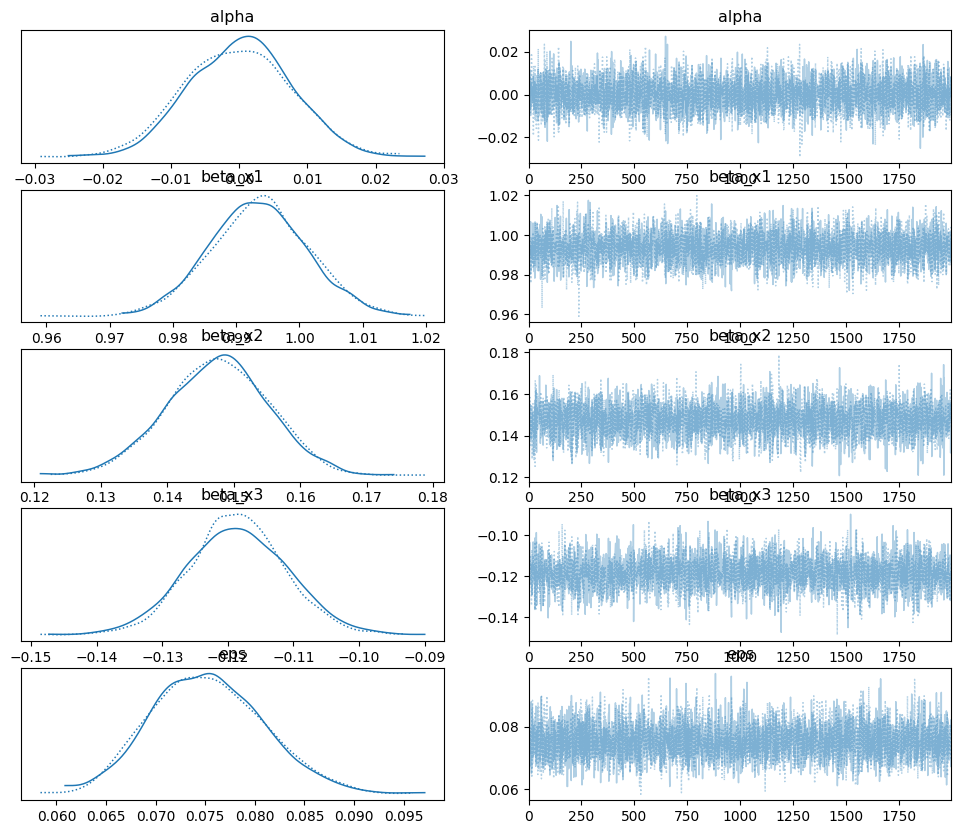

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

df = pd.read_csv('real_estate_data.csv')

x1   = df['Surface_area'].values
x2   = df['Rooms'].values
x3   = df['Distance_to_center'].values
y    = df['Price'].values

# Normalizarea datelor
x1_mean = (x1 - np.mean(x1)) / np.std(x1)
x2_mean = (x2 - np.mean(x2)) / np.std(x2)
x3_mean = (x3 - np.mean(x3)) / np.std(x3)
y_mean = (y - np.mean(y)) / np.std(y)

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta_x1 = pm.Normal('beta_x1', mu=0, sigma=10)
    beta_x2 = pm.Normal('beta_x2', mu=0, sigma=10)
    beta_x3 = pm.Normal('beta_x3', mu=0, sigma=10)

    sigma = pm.HalfCauchy('eps', 5)
    mu = alpha + beta_x1*x1_mean + beta_x2*x2_mean + beta_x3*x3_mean

    y_pred = pm.Normal('y_pred', mu=mu, sigma=sigma, observed=y_mean)
    idata_g = pm.sample(2000, tune=1000, return_inferencedata=True)

az.plot_trace(idata_g) # coeficientii ar trebui normalizati aici pentru a vedea valorile reala
print(az.summary(idata_g, kind="stats"))

# Observam ca pretul este cel mai mult influentat de suprafata, apoi de numarul de camere si de distanta fata de centru.